In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import norm, lognorm, probplot
import matplotlib.mlab as mlab
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None) #display all columns
%matplotlib inline

train = pd.read_csv("/Users/Erena/Desktop/kaggle/train.csv")
test = pd.read_csv("/Users/Erena/Desktop/kaggle/test.csv")

features = [x for x in train.columns if x not in ['id','loss']]
cat_features = [x for x in train.columns if 'cat' in x]
num_features = [x for x in train.columns if 'cont' in x]

In [3]:
cont=train.ix[0:999,117:131]
cont.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
cont2 = StandardScaler(with_std=True).fit_transform(cont)#standardize   normalization
cont2

array([[ 1.2410457 , -1.28319283, -1.51568492, ...,  0.47721989,
         1.55058011,  0.96197984],
       [-0.85456217,  1.08192456,  0.42634318, ..., -0.62211096,
         0.54333818, -0.87997021],
       [-1.218172  , -0.74194049, -0.09373077, ..., -0.58784639,
        -1.4405937 ,  1.22942927],
       ..., 
       [ 1.26533294,  0.20894219, -0.89207078, ...,  0.40596094,
         1.07635624,  0.99139021],
       [-0.08538652, -0.74194049, -0.30252739, ..., -0.9781457 ,
        -0.75560791, -1.25634842],
       [-0.19233619,  0.20894219,  0.11622119, ..., -0.83749582,
        -1.05323444, -0.97332299]])

In [6]:
# 10D
from sklearn import manifold
mds = manifold.MDS(n_components=10, max_iter=1000, eps=1e-6,
                   dissimilarity="euclidean", n_jobs=1)

In [7]:
cont_mds = mds.fit(cont2).embedding_
cont_mds

array([[ 0.08139439,  2.2181639 , -1.25770087, ..., -2.46219787,
         1.56073041, -0.86120626],
       [-0.72610434, -1.36657059,  0.50644423, ..., -0.18941499,
        -1.24889606, -1.52499702],
       [ 2.13553396, -0.43438945,  1.23321538, ...,  1.72123566,
         0.67166735, -0.08081433],
       ..., 
       [ 0.24196244,  1.21027559, -1.10944091, ..., -1.95401334,
         0.04498942,  1.16264256],
       [-0.42812205, -0.28106524,  1.88744436, ...,  0.3598237 ,
         0.37012527, -1.59919523],
       [-0.35547883,  0.05319923,  1.1328977 , ...,  1.67620721,
        -0.21160044, -0.6997065 ]])

In [8]:
import random
#generate 77 random colors, one for each cereal
random.seed(123)
color = ["#%06x" % random.randint(0, 0xAAAAAA) for i in range(0, cont2.shape[0])]
# image size
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 15, 15

In [16]:
names=pd.DataFrame(train['loss'])
names.head()

,loss
0,2213.18
1,1283.60
2,3005.09
3,939.85
4,2763.85


In [19]:
names2=names.ix[0:999,:]
names2.head()

,loss
0,2213.18
1,1283.60
2,3005.09
3,939.85
4,2763.85


In [20]:
names2_val=names2.values

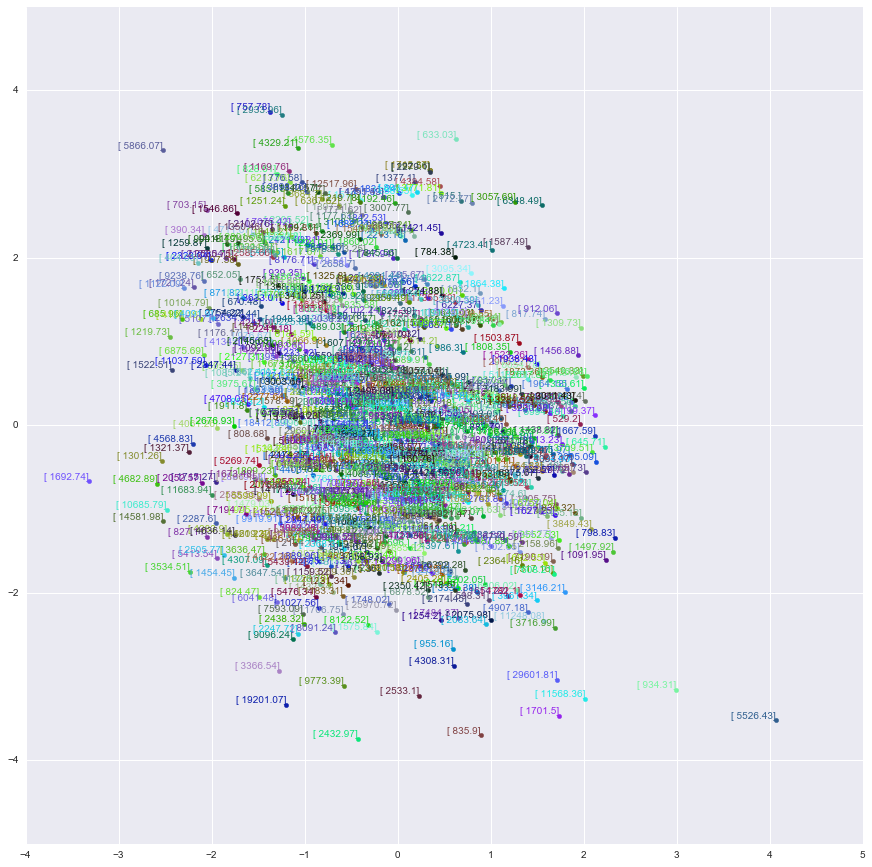

In [24]:
#scatter plot
for x, y, c in zip(cont_mds[:,0], cont_mds[:,1], color):
    plt.scatter(x,y,color=c)
#labels
for label, x, y, c in zip(names2_val, cont_mds[:,0],cont_mds[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

In [26]:
# 8D
from sklearn import manifold
mds8 = manifold.MDS(n_components=8, max_iter=1000, eps=1e-6,
                   dissimilarity="euclidean", n_jobs=1)

In [27]:
cont_mds8 = mds.fit(cont2).embedding_
cont_mds8

array([[  7.83958408e-01,   1.07168145e+00,  -1.84175794e+00, ...,
          1.72684327e+00,   2.53310747e+00,  -1.10400477e+00],
       [ -6.76412756e-01,   7.80106733e-01,  -6.60113248e-02, ...,
         -2.39734196e+00,  -6.15479838e-01,   1.28233698e+00],
       [ -1.53235500e+00,  -5.55318910e-01,  -1.55562770e-03, ...,
          1.22695824e-01,  -2.40925658e+00,  -1.99170386e+00],
       ..., 
       [  1.39377693e+00,  -2.57268443e-01,   4.42797513e-01, ...,
         -5.13433831e-01,   1.90778075e+00,  -1.02723763e+00],
       [ -1.98967579e+00,  -1.13106068e+00,  -1.08175039e+00, ...,
         -1.47618723e+00,  -2.80406156e-01,   2.23958589e-01],
       [ -1.29353158e+00,  -6.33457208e-01,  -1.21802742e+00, ...,
         -2.50285636e-01,  -1.33955738e+00,  -2.29509621e-01]])

In [28]:
# 9D
from sklearn import manifold
mds9 = manifold.MDS(n_components=8, max_iter=3000, eps=1e-9,
                   dissimilarity="euclidean", n_jobs=1)

In [29]:
cont_mds9 = mds.fit(cont2).embedding_
cont_mds9

array([[ 0.17473328, -0.55473595, -2.68014307, ...,  2.79942551,
         0.78560786, -0.39375137],
       [-1.16860933, -0.53803398,  2.31179893, ..., -0.68440956,
         0.27761575, -1.1364328 ],
       [ 1.98768642, -0.91780974,  1.67724834, ...,  0.42353467,
        -0.53158205,  2.06469934],
       ..., 
       [-1.51679853, -1.60654623, -1.93290919, ..., -0.22548798,
         0.50570889,  0.02761587],
       [-0.12347693,  0.12293292,  1.94138586, ..., -0.4372756 ,
         1.50379734,  1.1802659 ],
       [ 1.32963122,  0.10615717,  1.27260381, ..., -0.72814426,
         1.11984683,  0.61137099]])